In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import sklearn
sklearn.__version__

'0.20.2'

In [3]:
import pandas as pd
import pickle as pkl

In [53]:
%run utils.ipynb
%run targets.ipynb

In [5]:
file = 'ETHBTC_1m_1519496760000_1549568220000.csv'

In [6]:
# Get Data
df = pd.read_csv('../data/'+file)
df.shape
df.head(10)

(500000, 12)

,OPEN_TIME,OPEN,HIGH,LOW,CLOSE,VOLUME,CLOSE_TIME,QUOTE_VOL,NUM_TRADES,TAKE_BASE_VOL,TAKE_QUOTE_VOL,EXTRA
0,1519496760000,0.085541,0.085570,0.085407,0.085473,27.714,1519496819999,2.370345,192,15.308,1.309733,0
1,1519496820000,0.085473,0.085570,0.085448,0.085449,20.128,1519496879999,1.720609,122,6.579,0.562654,0
2,1519496880000,0.085448,0.085569,0.085400,0.085538,45.510,1519496939999,3.890176,209,19.426,1.660960,0
3,1519496940000,0.085538,0.085546,0.085402,0.085540,22.231,1519496999999,1.900513,105,14.320,1.224483,0
4,1519497000000,0.085539,0.085552,0.085464,0.085464,15.243,1519497059999,1.303412,117,8.373,0.716219,0
5,1519497060000,0.085466,0.085555,0.085464,0.085545,31.895,1519497119999,2.727413,131,19.237,1.645547,0
6,1519497120000,0.085545,0.085545,0.085464,0.085539,13.325,1519497179999,1.139346,78,7.311,0.625352,0
7,1519497180000,0.085539,0.085555,0.085414,0.085517,28.202,1519497239999,2.411093,195,14.409,1.232346,0
8,1519497240000,0.085460,0.085545,0.085419,0.085534,15.302,1519497299999,1.307959,134,7.216,0.617035,0
9,1519497300000,0.085440,0.085545,0.085440,0.085533,13.730,1519497359999,1.173580,105,6.186,0.529001,0


In [7]:
data = df.loc[:, ['OPEN_TIME', 'CLOSE_TIME', 'OPEN', 'HIGH', 'LOW', 'CLOSE']]
data.shape
data[:5]

(500000, 6)

,OPEN_TIME,CLOSE_TIME,OPEN,HIGH,LOW,CLOSE
0,1519496760000,1519496819999,0.085541,0.085570,0.085407,0.085473
1,1519496820000,1519496879999,0.085473,0.085570,0.085448,0.085449
2,1519496880000,1519496939999,0.085448,0.085569,0.085400,0.085538
3,1519496940000,1519496999999,0.085538,0.085546,0.085402,0.085540
4,1519497000000,1519497059999,0.085539,0.085552,0.085464,0.085464


In [37]:
cv_folds = get_ts_cv_folds(len(data), n_folds=6, frac_min_tr=0.4, max_tr='frac_min_tr')

In [66]:
np.random.randint(len(data))

349390

In [85]:
%run utils.ipynb

res_ = pd.DataFrame({'tr_pos': [], 'sp_pos': [], 'cv_pos': [], 'ks': [], 'norm': [], 'kl': []})
for i in range(10000):
    # sp_pos = np.random.randint(len(data))
    # cv_pos = np.random.randint(sp_pos, len(data))
    sp_pos = np.random.randint(int(len(data)*0.9))
    cv_pos = sp_pos + 50000
    tr_pos = np.random.randint(sp_pos)
    
    d1 = data.iloc[tr_pos:sp_pos, 2]
    d2 = data.iloc[sp_pos:cv_pos, 2]

    diff_res = distribution_diff(d1, d2, plot=False)
    res_ = res_.append(pd.Series({
        'tr_pos': tr_pos,
        'sp_pos': sp_pos,
        'cv_pos': cv_pos,
        'ks'    : diff_res['ks'],
        'norm'  : diff_res['norm'],
        'kl'    : diff_res['kl']
    }, name=i))

res_

,cv_pos,kl,ks,norm,sp_pos,tr_pos
0,289288.0,0.522054,0.983340,0.052109,239288.0,65279.0
1,376319.0,1.194973,0.692001,0.068692,326319.0,255568.0
2,103700.0,1.103281,0.261526,0.049576,53700.0,5555.0
3,334090.0,1.694799,0.974179,0.048250,284090.0,6994.0
4,305410.0,0.615750,0.994181,0.044192,255410.0,67937.0
5,108762.0,0.990674,0.278200,0.043741,58762.0,11562.0
6,401479.0,0.774786,0.551358,0.035683,351479.0,254814.0
7,116168.0,1.238592,0.438513,0.054635,66168.0,4505.0
8,255224.0,0.568857,0.988276,0.054409,205224.0,80409.0
9,475359.0,0.970675,0.410622,0.045549,425359.0,153773.0


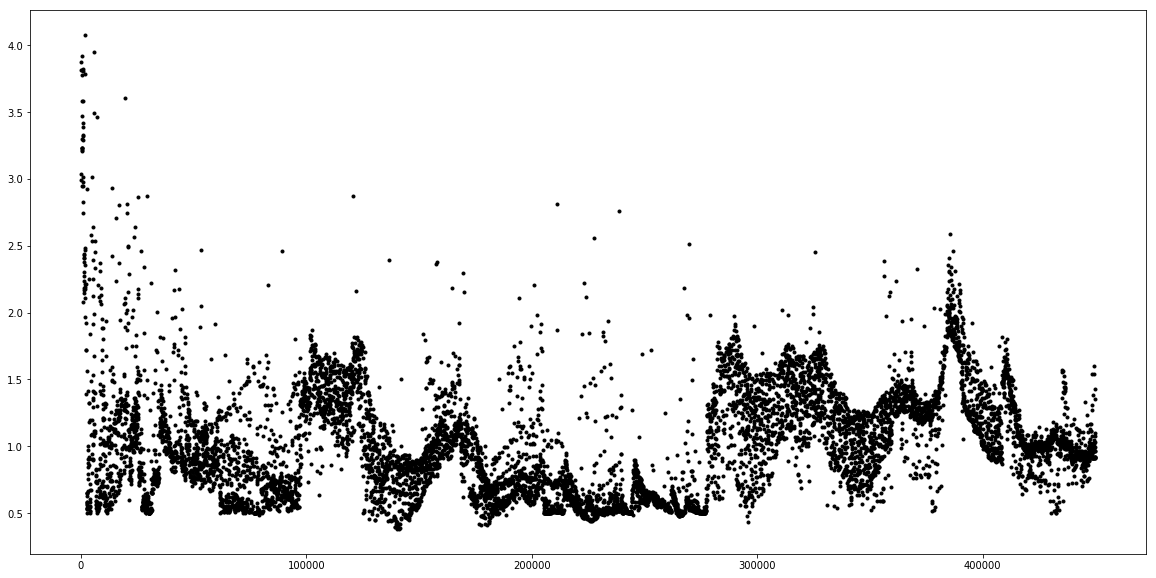

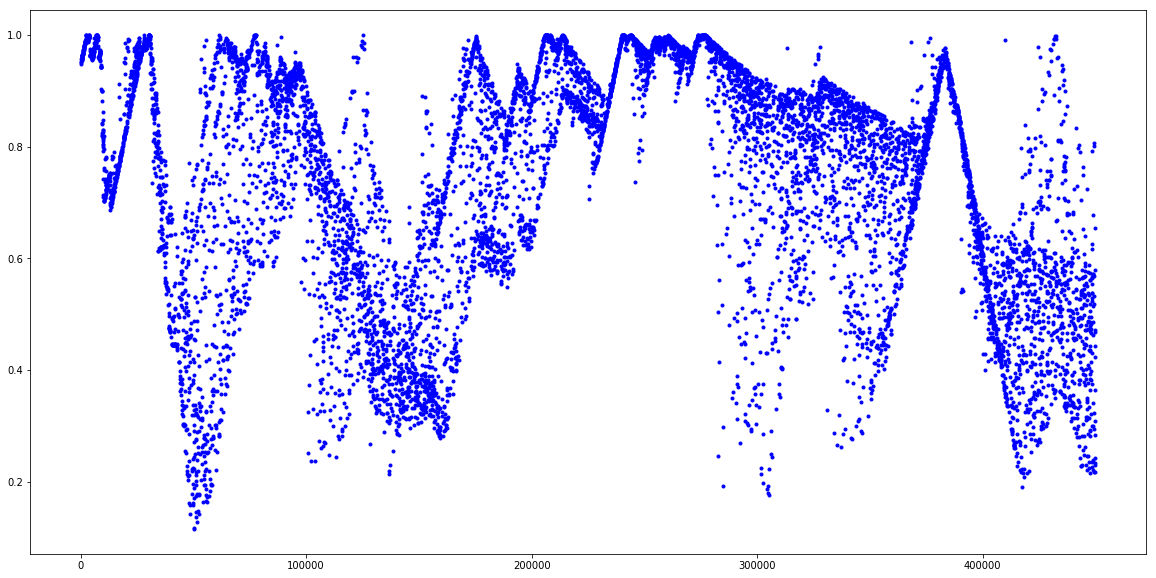

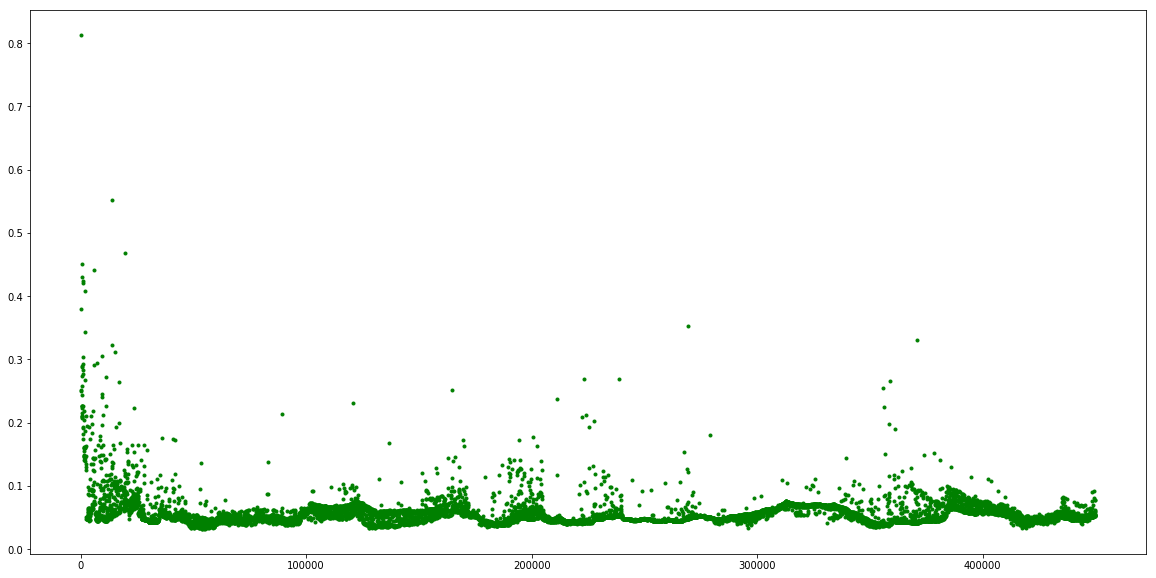

In [96]:
plt.figure(figsize=(20, 10))
plt.plot(res_.sp_pos, res_.kl, 'k.')
plt.show()
plt.figure(figsize=(20, 10))
plt.plot(res_.sp_pos, res_.ks, 'b.')
plt.show()
plt.figure(figsize=(20, 10))
plt.plot(res_.sp_pos, res_.norm, 'g.')
plt.show()

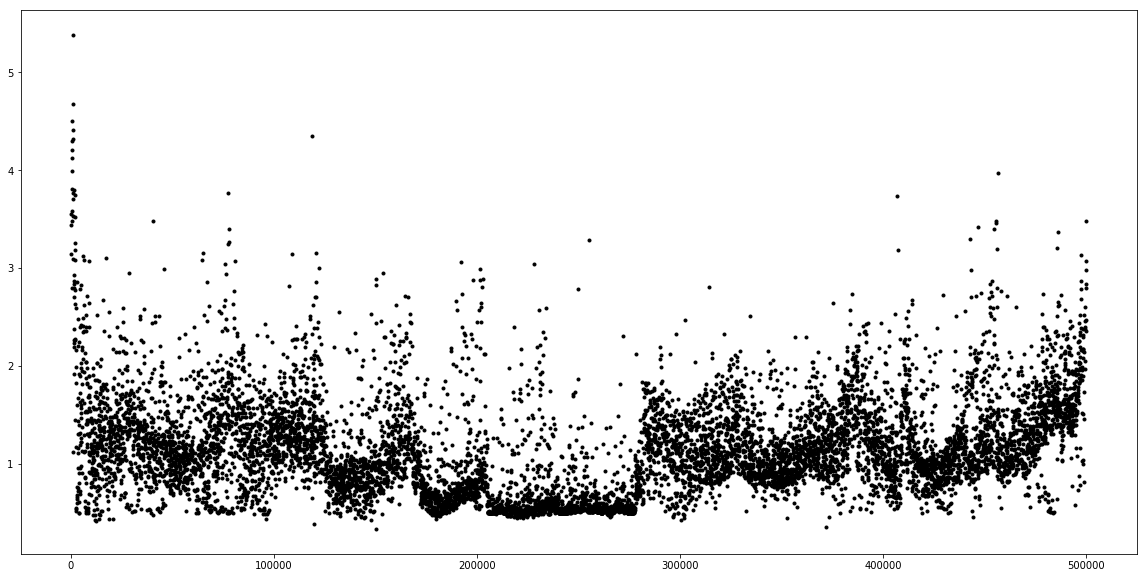

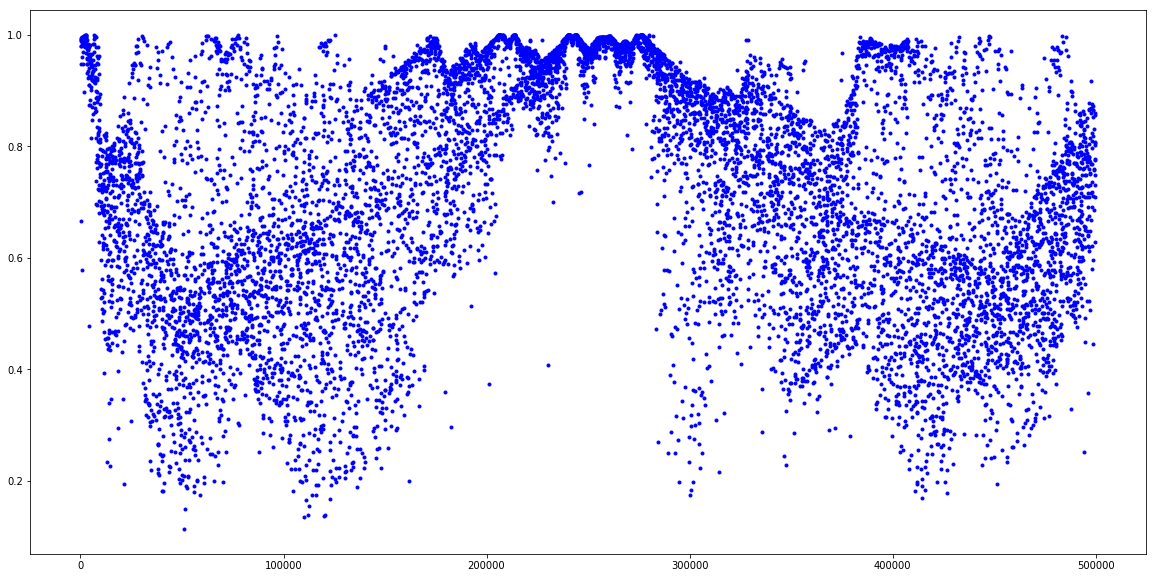

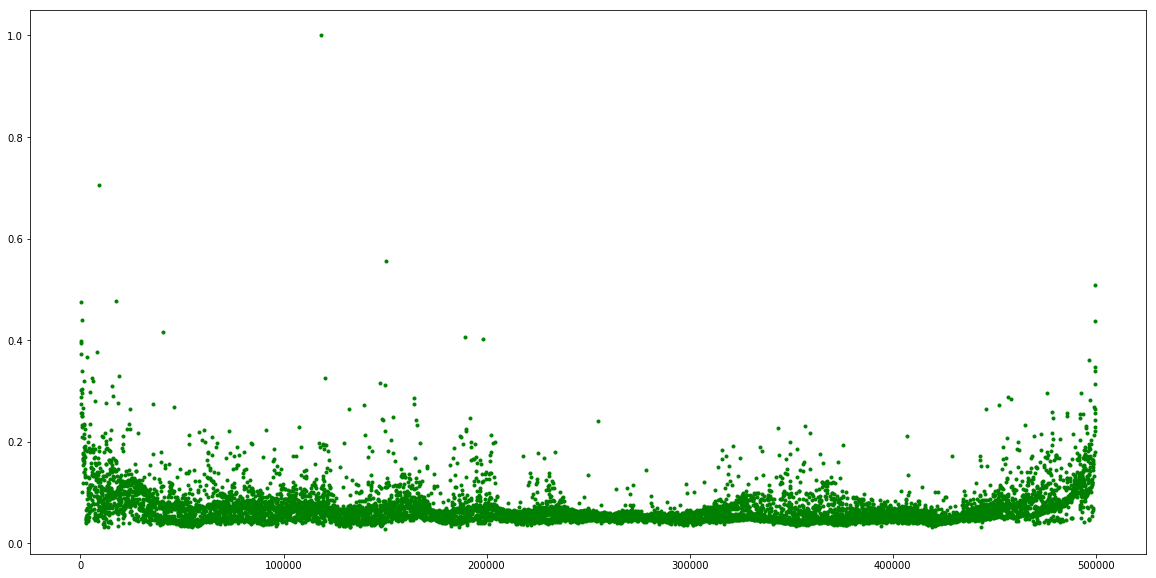

In [97]:
plt.figure(figsize=(20, 10))
plt.plot(res.sp_pos, res.kl, 'k.')
plt.show()
plt.figure(figsize=(20, 10))
plt.plot(res.sp_pos, res.ks, 'b.')
plt.show()
plt.figure(figsize=(20, 10))
plt.plot(res.sp_pos, res.norm, 'g.')
plt.show()

In [61]:
from scipy import stats
np.random.seed(12345678)  #fix random seed to get the same result
n1 = 200  # size of first sample
n2 = 200  # size of second sample

rvs1 = stats.norm.rvs(size=n1, loc=0., scale=1)
rvs2 = stats.norm.rvs(size=n2, loc=0., scale=1)
stats.ks_2samp(rvs1, rvs2)

Ks_2sampResult(statistic=0.08999999999999997, pvalue=0.3766591349483967)

In [29]:
from scipy import stats
np.random.seed(12345678)  #fix random seed to get the same result
n1 = 200  # size of first sample
n2 = 3000  # size of second sample

rvs1 = stats.norm.rvs(size=n1, loc=0., scale=1)
rvs2 = stats.norm.rvs(size=n2, loc=0., scale=1)
stats.ks_2samp(rvs1, rvs2)

Ks_2sampResult(statistic=0.07199999999999995, pvalue=0.2752686670334619)

In [31]:
from scipy import stats
np.random.seed(1234567)  #fix random seed to get the same result
n1 = 2000  # size of first sample
n2 = 300  # size of second sample

rvs1 = stats.norm.rvs(size=n1, loc=0., scale=1)
rvs2 = stats.norm.rvs(size=n2, loc=0., scale=1)
stats.ks_2samp(rvs1, rvs2)

Ks_2sampResult(statistic=0.05116666666666658, pvalue=0.49164869944726625)